## Lending Club Credit Risk Modeling
- In this project, I will build three **machine learning** models to predict the three components of expected loss in the context of **credit risk modeling** at the **Lending Club** (a peer-to-peer credit company): **Probability of Default (PD), Exposure at Default (EAD) and Loss Given Default (LGD)**. The expected loss will be the product of these elements: **Expected Loss (EL) = PD * EAD * LGD**. These models will be used to stablish a credit policy, deciding wheter to grant a loan or not for new applicants (application model) based on their credit scores and expected losses on loans. By estimating the Expected Loss (EL) from each loan, the Lending Club can also assess the required capital to hold to protect itself against defaults.
- The PD modelling encompasses a binary classification problem with target being 1 in case of non-default and 0 in case of default. A Logistic Regression model will be built. 
- The LGD and EAD modelling encompasses a beta regression problem, that is, a regression task in which the dependent variables are beta distributed, the recovery rate and credit conversion factor, respectively.
- The **solution pipeline** is based on the **crisp-dm** framework:
    1. Business understanding.
    2. Data understanding.
    3. Data preparation.
    4. Modelling.
    5. Validation.
    6. Deployment.
- Below, I will introduce **information** about the **company**, the **business problem**, the **project objectives and benefits**, and some important **concepts** to have in mind, given that I am dealing with a credit risk problem.

## Lending Club
- **What is the Lending Club?:**
    - LendingClub is a **peer-to-peer lending platform** that facilitates the borrowing and lending of money directly between individuals, without the need for traditional financial institutions such as banks. The platform operates as an online marketplace, connecting borrowers seeking personal loans with investors willing to fund those loans.

## Business Problem: Managing Default Risks and Optimizing Returns
- **What is the business problem?**
    - LendingClub faces a significant business challenge related to **managing default risks effectively** while **optimizing returns** for its investors. The platform facilitates peer-to-peer lending, connecting borrowers with investors, and relies on **accurate risk assessments to maintain a sustainable and profitable lending ecosystem.** Thus, the CEO wants us to provide insights about which factors are associated with credit risk in Lending Club's operations, and to construct models capable of predicting the probability of default for new applicants and possible losses on its loans in order to establish a credit policy, deciding when to grant a loan or not for an applicant. An important observation is that the CEO wants these models to be easy to understand. Since our company works on the internet, making customers happy and being clear is really important. So, we need to be able to explain why we decide to approve or deny a loan.
- **Which are the project objectives and benefits?**
    1. Identify the factors associated with **credit risk** in the form of business **insights.**
    2. Develop an accurate **Probability of Default (PD) Model**, constructing a scorecard. This will allow Lending Club to decide wheter to grant a loan or not to a new applicant (**application model**), based on **credit scores.**
    3. Develop **Exposure at Default (EAD) and Loss Given Default (LGD) Models**, to estimate the **Expected Loss** in loans. This will allow Lending Club to **hold** sufficient **capital** to protect itself against default in each loan.
    4. Improve **risk management** and optimize **returns** by establishing a **credit policy**, trying to balance risk and **ROI** of Lending Club's assets.
    5. Apply **model monitoring** and maintenance techniques to safeguard our results from population instability, characterized by significant changes in loan applicants' characteristics. This will allow us to understand whether the built model is still useful in the future or whether the loan applicants characteristics changed significantly, such that we will need to redevelop it.

## Credit Risk Modeling Concepts: The Context of the Problem
- **Financial institutions**, like LendingClub and online lending platforms, **make money by lending to people and businesses.** When they lend money, they **charge interest**, which is a significant source of their **profits**. **Managing credit risk well is crucial** for these institutions. This means ensuring that borrowers pay back their loans on time to avoid losses.
- **Credit risk** is the possibility that a borrower might not fulfill their financial obligations, leading to a loss for the lender. If a borrower fails to meet the agreed-upon terms, it's called a "default," and it can result in financial losses for the lender. The **default** definition is associated with a time horizon. For example, if a borrower hasn't paid their debt within 90 days of the due date, they are considered in default.
- In the credit market, important **rules** help keep things honest and clear. **Basel III** is one such set of rules, making sure banks have **enough money (capital requirements)** and follow **guidelines for assessing loan risks**. The **Internal Rating-Based Approach (IRB-A)** lets banks figure out credit risks using concepts like Probability of Default (PD), Exposure at Default (EAD), and Loss Given Default (LGD). Another rule, **International Financial Reporting Standard 9 (IFRS 9)**, gives standards for measuring financial assets. It's special because it looks at the chance of a loan not being paid back over its entire life, unlike Basel, which checks it for one year. These rules help banks have enough money, handle risks well, and keep the credit market steady and trustworthy.
- The **"expected loss (EL)"** is the average estimated loss that a lender can expect from loans that default. It involves three factors: the **probability of default (likelihood of a borrower defaulting)**, **loss given default (portion of the amount the bank is exposed to that can't be recovered in case of default)**, and **exposure at default (potential loss at the time of default, considering the outstanding loan amount and other factors)**.
- **LendingClub**, operating as a peer-to-peer lending platform, uses a **"PD Model/Credit Scoring Model" to assess borrowers' creditworthiness using credit scores**. This helps determine the **likelihood of loan repayment**, guiding the decision to **approve or deny the loan.** The **required capital to guard against default** for each loan is calculated using **EAD and LGD Models** to estimate the **Expected Loss (EL)**, contributing to minimizing risk in credit operations.
- When creating a Credit Scoring Model, which assesses creditworthiness for loan approval, using data available at the time of the application is considered an **"application model."** It is distinct from a "behavior model." This is the model I will build here.
- A **"credit policy"** is a set of guidelines that financial institutions follow to evaluate and manage lending risk. It involves setting a cut-off point, a threshold based on credit scores, or risk categories, to decide whether to approve or reject loan applications. Another factors such as the expected ROI for each loan application are included.
- **"Return on Investment (ROI)"** is a key measure of loan profitability. Balancing ROI with risk is vital for effective credit policy management. While higher-risk loans may offer more significant potential returns, they also come with a higher chance of default.

In **this notebook**, I intend to **construct the Probability of Default (PD) model**, assigning **credit scores** to the applicants, encompassing steps 3, 4, and 5 of the CRISP-DM framework. To achieve this, the insights found in exploratory data analysis (EDA) and the details about how the preprocessing will be done will be employed here. **We will preprocess our data, construct the PD model, and evaluate it.** Furthermore, the rationale behind each decision is detailed below.

#### 3.0 Import the libraries

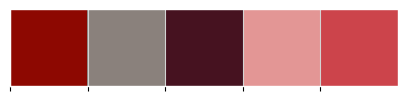

In [1]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

# Modeling.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, brier_score_loss
import statsmodels.api as sm

# Utils.
from src.eda_utils import *
from src.modelling_utils import *

# Display options.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Visualization Settings
mpl.style.use('ggplot')
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['axes.grid']           = True
#mpl.rcParams['figure.dpi']          = 150

# Palette Seting
instyle_palette = ['#8d0801', '#8a817c', '#461220', '#e39695', '#cc444b']
sns.set_palette(sns.color_palette(instyle_palette))
sns.palplot(sns.color_palette(instyle_palette))

#### 3.1.0 Collect the data
- The data contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and the latest payment information. 
- It is much more clean after the data cleaning task performed, including most of the relevant variables in its correct data types, some missing and outlier values already treat and reduced memory usage in a parquet file. Thus, in this step I will just quickly assess remaining missing values and other necessary treatments to be made in the preprocessing.
- This include consumer loans, as explained above in Lending Club's services, and encompasses data available at the moment of the application. Thus, it will be used to build an application model.

In [2]:
parquet_file_path = '/Users/pedrohenriquealmeidaoliveira/Documents/data_science/lending_club_credit_scoring/input/clean_loan_data.parquet'
df = pd.read_parquet(parquet_file_path)

In [3]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,default,recovery_rate,credit_conversion_factor
0,25000,25000,36,11.89,829.099976,B,B4,0,RENT,85000.0,Verified,2009-08-01,Fully Paid,debt_consolidation,CA,19.480000,0,0,NaN,10,0,28854,52.099998,42,f,0.0,29324.320312,25000.000000,4324.319824,0.000000,0.000000,0.000000,7392.080078,0.0,0,NaN,NaN,NaN,281,1,0.000000,0.000000
1,1000,1000,36,16.08,35.200001,F,F2,0,RENT,30000.0,Not Verified,2008-07-01,Does not meet the credit policy. Status:Fully ...,debt_consolidation,IL,23.840000,0,1,NaN,9,0,10125,90.400002,15,f,0.0,1207.760010,999.989990,207.770004,0.000000,0.000000,0.000000,538.969971,0.0,0,NaN,NaN,NaN,192,1,0.000000,0.000010
2,7000,7000,36,10.71,228.220001,B,B5,0,RENT,65000.0,Not Verified,2008-05-01,Fully Paid,credit_card,NY,14.290000,0,0,NaN,7,0,33623,76.699997,7,f,0.0,8215.450195,7000.000000,1215.449951,0.000000,0.000000,0.000000,228.479996,0.0,0,NaN,NaN,NaN,202,1,0.000000,0.000000
3,7000,7000,36,16.08,246.380005,F,F2,10,MORTGAGE,189500.0,Verified,2008-04-01,Does not meet the credit policy. Status:Charge...,debt_consolidation,CA,22.469999,0,4,0.0,16,0,150971,92.300003,31,f,0.0,1231.900024,783.460022,448.190002,0.000000,0.250000,0.045000,246.380005,0.0,0,NaN,NaN,NaN,347,0,0.000036,0.888077
4,25000,25000,36,16.99,891.200012,D,D3,1,RENT,70000.0,Verified,2014-08-01,Charged Off,debt_consolidation,NY,10.500000,0,0,41.0,10,0,19878,66.300003,17,f,0.0,6073.100098,1634.650024,1038.949951,44.560001,3354.939941,603.889221,935.760010,0.0,0,0.0,34561.0,30000.0,206,0,0.134198,0.934614


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466256 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   loan_amnt                    int32         
 1   funded_amnt                  int32         
 2   term                         int8          
 3   int_rate                     float32       
 4   installment                  float32       
 5   grade                        category      
 6   sub_grade                    category      
 7   emp_length                   int16         
 8   home_ownership               category      
 9   annual_inc                   float32       
 10  verification_status          category      
 11  issue_d                      datetime64[ns]
 12  loan_status                  category      
 13  purpose                      category      
 14  addr_state                   category      
 15  dti                          float32       
 16  delinq_

- It is possible to see that the variables are in the correct data types, with optimized memory usage.

In [5]:
missing_df = df.isna().sum().to_frame().rename(columns={0: 'count'}).sort_values(by=['count'], ascending=False)
missing_df['pct'] = round(missing_df['count'] / df.shape[0] * 100, 3)
missing_df.head(10)

,count,pct
mths_since_last_delinq,250322,53.688
total_rev_hi_lim,70247,15.066
tot_cur_bal,70247,15.066
tot_coll_amt,70247,15.066
revol_util,311,0.067
collections_12_mths_ex_med,116,0.025
loan_amnt,0,0.000
total_rec_late_fee,0,0.000
initial_list_status,0,0.000
out_prncp,0,0.000


- It is possible to see that there are some remaining missing values that will require treatment in the preprocessing step.


#### 3.1.1 What will our PD model be?
- The PD Model will be a Logistic Regression with dummy variables, that is, variables that indicate 1 whether a category is present, else 0. This is because the CEO wants us to build an interpretable model. It is important to make customers happy and explain why the model makes certain decisions, such as approving or denying a loan, especially in the online environment.
- The PD model is interpretable because it estimates a linear regression score as the log-odds. The log-odds is the logarithm of the ratio of the probability of being a good borrower and the probability of being a bad borrower:

    - $ \ln\left(\frac{P(Y=1)}{P(Y=0)}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_mX_m $.

- If we take the exponential on both sides of the equation, we get the odds of being a good borrower:

    - $ \frac{P(Y=1)}{P(Y=0)} = \exp(\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_mX_m) $.

- Now, considering we are constructing only dummy variables, each variable value represented by $X_1$, $X_2$, ..., $X_m$ can only assume either 0 or 1. Let's look at the variable $X_1$, for example.
- The difference between the log-odds of being good when $X_1=1$ and $X_1=0$ will be:

     - $ \ln\left(\frac{P(Y=1|X_1=1)}{P(Y=0)|X_1=1}\right) - \ln\left(\frac{P(Y=1|X_1=0)}{P(Y=0)|X_1=0}\right) = \beta_1 = ( \cancel{\beta_0} + \cancel{\beta_2X_2} + ... + \cancel{\beta_mX_m} + \beta_1 \cdot 1 ) - ( \cancel{\beta_0} + \cancel{\beta_2X_2} + ... + \cancel{\beta_mX_m} + \beta_1 \cdot 0 ) $

- Which is equal to:

    - $ \ln\left(\frac{P(Y=1|X_1=1)}{P(Y=0)|X_1=1}\right) - \ln\left(\frac{P(Y=1|X_1=0)}{P(Y=0)|X_1=0}\right) = \beta_1 $.

- Considering the difference of logs is the ratio of logs, we have:

    - $ \frac{\ln\left(\frac{P(Y=1|X_1=1)}{P(Y=0)|X_1=1}\right)}{\ln\left(\frac{P(Y=1|X_1=0)}{P(Y=0)|X_1=0}\right)} = \beta_1 $.

- And, taking the exponential, we have:

    - $ \frac{\text{odds}(Y=1|X_1=1)}{\text{odds}(Y=1|X_1=0)} = \exp(\beta_1) $.

- And wow! The odds of being good when $X_1$ is equal to 1 is $\exp(\beta_1)$ times the odds of being good when $X_1$ is equal to 0!

    - $ \text{odds}(Y=1|X_1=1) = \exp(\beta_1) \times \text{odds}(Y=1|X_1=0) $.
    
- That is why our PD Model is easily interpretable. We can directly assess the odds of being good increase/decrease when an applicant shows a certain characteristic. A possible example would be "The odds of being good for borrowers with A grade is x times the odds of being good for borrowers with G grade".
Not only can this comparison be made directly with the reference category, but we can also compare to any pair of categories belonging to the same original independent variable. If we want to see the odds of being good increase/decrease when an applicant has characteristic x compared to a characteristic y, we just multiply the odds with y to $\exp(\beta_x - \beta_y)$!
- An important observation is that these pair comparisons can only be made between categories belonging to the same original independent variable because they are mutually exclusive. It doesn't make sense to compare the odds of being good for a customer who has grade A to the odds of being good for a customer with 0 employee length. Of course, an A grade applicant can present 0 years of professional experience!

#### 3.2.0 Data preprocessing
- In this step, I will apply the preprocessing required for estimating our PD Model.
- As mentioned above, the PD Model will be a Logistic Regression with dummy variables because interpretability is required. We need to understand why the model makes certain decisions, including the reasons for granting or denying a loan.
- I will remove some variables like collections_12_mths_ex_med because they will not be available at the moment of prediction. By doing this, we avoid data leakage. Moreover, there are other variables that will be removed because I saw in the EDA step that they present either a high imbalance or no discriminatory power.
- I will remove the variable tot_rev_hi_lim because, in the EDA step, I observed it is highly positively correlated with revol_bal. Considering revol_bal does not have any missing values, I decided to keep it. It is important to remove highly correlated features before estimating our PD Model because it can lead to multicollinearity issues, affecting the coefficient estimation.
- It is necessary to impute missing values in mths_since_last_delinq and tot_cur_bal. I will investigate their distributions and assess whether there is a pattern in missing occurrences, that is, these records are missing not at random (MNAR), or if these records are missing completely at random (MCAR).
- Once we construct dummy variables, it will not be necessary to apply feature scaling. One-hot encoding the features already scales them, assigning values of either 0 or 1.
- In the EDA, we defined how the dummies would be constructed. That is, we observed the discriminatory power of each independent variable's categories to determine which would be the final categories for creating dummies. Essentially, we combined categories with similar discriminatory power (based on Weight of Evidence (WoE)), while balancing the number of observations falling into them. We did this to reduce the final dimensionality, improving our PD model's performance. The same approach was applied to continuous features, where we first applied feature discretization, observing the WoE across the ordered discretized bins. Therefore, now that the final categories are already determined, I will perform the same process here (feature discretization and categories combining), finally constructing the dummies we pre-determined and obtaining the prepared data for modeling.

In [6]:
# Investigate missing values in mths_since_last_delinq.
df['mths_since_last_delinq'].describe()

count    215934.000000
mean         34.104431
std          21.778486
min           0.000000
25%          16.000000
50%          31.000000
75%          49.000000
max         188.000000
Name: mths_since_last_delinq, dtype: float64

- The missing values don't represent zero because they are already part of the variable values.

In [7]:
# Investigate missing values pattern in mths_since_last_delinq.
last_delinq_na = df.loc[df['mths_since_last_delinq'].isna()]
last_delinq_na['default'].value_counts(normalize=True)

default
1    0.889418
0    0.110582
Name: proportion, dtype: float64

- The missing values don't show patterns regarding default occurrence. A similar default rate is observed when compared to the whole dataset.
- Considering that we saw in the EDA step that borrowers with a lower number of months since the last delinquency tend to present higher credit risk, including those with a value of 0, indicating a period of less than one month, we can infer that the missing values represent borrowers who were never delinquent.
- Thus, I will create a dummy for these missing values, indicating borrowers who were never delinquent. Imputing with mean/median would introduce bias to the model and would not be a realistic approach.

In [8]:
# Investigate missing values in tot_cur_bal.
df['tot_cur_bal'].describe()

count    3.960090e+05
mean     1.388017e+05
std      1.521147e+05
min      0.000000e+00
25%      2.861800e+04
50%      8.153900e+04
75%      2.089530e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

- The missing values don't represent zero because they are already part of the variable values.

In [9]:
# Investigate missing values pattern in tot_cur_bal.
tot_cur_bal_na = df.loc[df['tot_cur_bal'].isna()]
tot_cur_bal_na['default'].value_counts(normalize=True)

default
1    0.844605
0    0.155395
Name: proportion, dtype: float64

- It is evident that the bad rate is higher for observations with missing values in the total current balance. Considering this, we will treat these missing values as another category of this variable, creating a dummy variable for them. Imputing would not be the best approach, since the variable is extremely right-skewed, affecting both mean and median, and introducing bias to our model because the default event is not random in this case. Moreover, this missing category will be the new reference category for tot_cur_bal, once it presents a default rate and a credit risk even higher than the others observed in the eda notebook.

- Dropping variables that would introduce data leakage and irrelevant variables.

In [10]:
data_leakage_features = ['funded_amnt', 'installment', 'revol_util', 
                         'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 
                         'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                         'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt']
irrelevant_features = ['delinq_2yrs', 'acc_now_delinq', 'pub_rec', 'total_rev_hi_lim', 
                       'recovery_rate', 'credit_conversion_factor', 'loan_status']
to_drop = data_leakage_features + irrelevant_features
df = df.drop(columns=to_drop)
df.shape

(466256, 22)

#### 3.2.1 Split the data
- In the context of credit it's important to use an **out-of-time split** instead of an out-of-sample split because we want to understand how well the model, trained with past data, can predict the default of credit applicants in a future time. 
- The data was already sorted in data cleaning task, providing a chronological order for the loans. Thus, we only need to separate the first **80%** of the data for **training** and the remaining **20%** of the data for **testing**.
- I'll split the data first because the **test set** should contain data that the model hasn't encountered before, mimicking a **real-world production scenario.** So, I'll **set it aside now** and only use it for the final evaluation of the model later on.
- Furthermore, it's crucial to fit and transform only the training data to prevent issues like data leakage and overfitting, ensuring a reliable final performance estimate. Test data must only be transformed. Thus, the feature discretization and dummy creation will follow this guideline. That's why I am splitting it before encoding.

In [11]:
# Out-of-time split. 80% training, 20% testing.
train, test = np.split(df, [int(.80 * len(df))])
train['set'] = 'train'
test['set'] = 'test'

In [12]:
# Observe train and test default rates.
print(f"Train default rate: {train['default'].value_counts(normalize=True)}.")
print()
print(f"Test default rate: {test['default'].value_counts(normalize=True)}.")

Train default rate: default
1    0.880151
0    0.119849
Name: proportion, dtype: float64.

Test default rate: default
1    0.932859
0    0.067141
Name: proportion, dtype: float64.


- It is possible to see that test data applicants present a lower default rate.

In [13]:
# Assessing train and test sets dimensions.
print(f'Train set has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test set has {test.shape[0]} rows and {test.shape[1]} columns.')

Train set has 373004 rows and 23 columns.
Test set has 93252 rows and 23 columns.


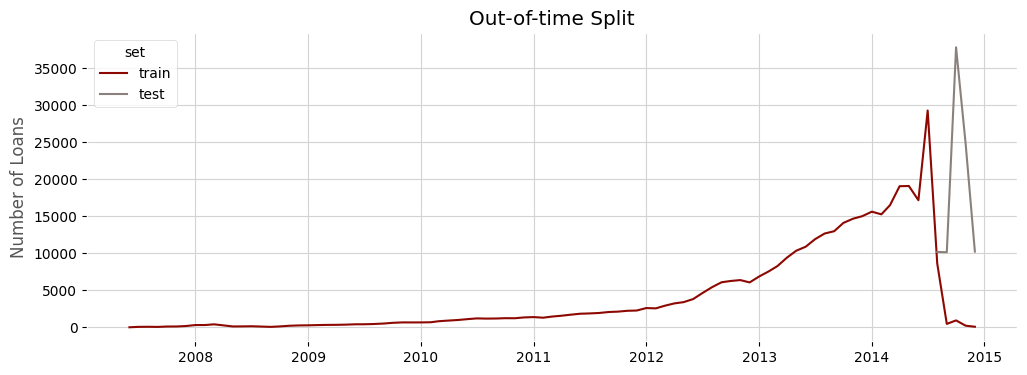

In [14]:
# Plot the out-of-time split.
train_test = pd.concat([train, test])
train_test = train_test.groupby(['issue_d', 'set'])['default'].count().reset_index().rename(columns={'default': 'loans'})

fig, ax = plt.subplots(figsize=(12, 4))
plt.title('Out-of-time Split')
sns.lineplot(train_test, x='issue_d', y='loans', hue='set', ax=ax)
plt.xlabel('')
plt.ylabel('Number of Loans')
plt.show()

# Drop columns used only for plotting.
to_drop = ['issue_d', 'set']
train = train.drop(columns=to_drop)
test = test.drop(columns=to_drop)

- The out-of-time split was successfully made.
- It is possible to see an increasing trend for the number of loans over time.

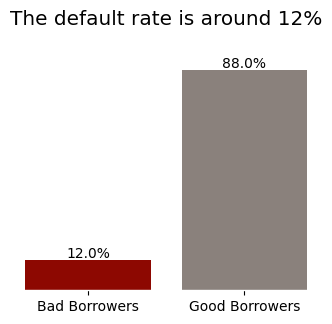

In [15]:
fig, ax = plt.subplots(figsize=(4, 3))

default_grouped = train.groupby(['default'])[['default']].count().rename(columns={'default': 'count'}).reset_index()
default_grouped['pct'] = default_grouped['count'] / default_grouped['count'].sum() * 100

bars = ax.bar(x=default_grouped['default'], height=default_grouped['pct'], color=instyle_palette, width=0.8)
for bar, pct in zip(bars, default_grouped['pct']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')
ax.set_title('The default rate is around 12%', pad=25)
ax.set_xticks(ticks=default_grouped['default'], labels=['Bad Borrowers', 'Good Borrowers'])
ax.yaxis.set_visible(False)
ax.grid(False)

- The default rate is around 12%. This motivates our project, there is indeed space for improvement in Lending Club's credit granting.
- We are dealing with an imbalanced classification problem.

#### 3.2.2 Feature discretization, categories bundling and one-hot encoding
- As I mentioned above, we will perform feature discretization and categories bundling to obtain the dummies by applying one-hot encoding as we determined in the EDA step.
- I will first obtain all final categories by applying feature discretization and categories bundling, and then one-hot encode everything.
- An important observation is that, as it is necessary to create n-1 dummies for each independent variable, the preprocessors built already handle the removal of reference categories. This also applies to the imputation of missing values in 'mths_since_last_delinq' and 'tot_cur_bal,' treating them as 'never_delinquent' or 'missing' categories, followed by the creation of corresponding dummies.
- The preprocessor classess responsible for performing these tasks are contained in the modeling_utils.py file. I have developed preprocessor classes to simplify the preprocessing steps, streamlining the entire process in an organized and modular manner. As we transition to the production environment in the future, a new comprehensive pipeline with more preprocessor components will be constructed, encompassing all the cleaning steps from raw data collection to now.
- The whole same process applied to training will be applied to testing, transforming it.

In [16]:
# Obtain predictor and target train and test sets.
X_train = train.drop(columns=['default'])
y_train = train['default'].copy()
X_test = test.drop(columns=['default'])
y_test = test['default'].copy()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((373004, 20), (373004,), (93252, 20), (93252,))

In [17]:
# Preprocess the train and test sets.

# Construct a pipeline.
pipe = Pipeline(
    steps=[
        ('discretizer_combiner', DiscretizerCombiner()),
        ('cat_combiner', CatCombiner()),
        ('cat_imputer', CatImputer()),
        ('cat_one_hot_encoder', CatOneHotEncoder())
    ]
) 

X_train_prepared = pipe.fit_transform(X_train)
X_test_prepared = pipe.transform(X_test)
X_train_prepared.shape, X_test_prepared.shape

((373004, 97), (93252, 97))

In [18]:
# Assess whether we obtained the desired dummies dataframe for the PD modeling.
X_train_prepared.head()

,loan_amnt_14.3K-21.2K,loan_amnt_21.2K-28.1K,loan_amnt_7.4K-14.3K,loan_amnt_<=7.4K,term_36,int_rate_10.0-12.0,int_rate_12.0-14.0,int_rate_14.0-16.0,int_rate_16.0-18.0,int_rate_18.0-22.0,int_rate_7.0-10.0,int_rate_<=7.0,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,sub_grade_A3_A2_A1,sub_grade_A5_A4,sub_grade_B2_B1,sub_grade_B4_B3,sub_grade_C2_C1_B5,sub_grade_C5_C4_C3,sub_grade_D3_D2_D1,sub_grade_E1_D5_D4,sub_grade_E5_F1_E4_E3_E2,emp_length_1-3,emp_length_10,emp_length_4-6,emp_length_7-9,home_ownership_MORTGAGE,home_ownership_OWN,annual_inc_120.0K-150.0K,annual_inc_20.0K-40.0K,annual_inc_40.0K-60.0K,annual_inc_60.0K-75.0K,annual_inc_75.0K-90.0K,annual_inc_90.0K-120.0K,annual_inc_>150.0K,verification_status_Not Verified,verification_status_Source Verified,purpose_credit_card,purpose_debt_consolidation,purpose_other_house_medical_vacation,purpose_wedding_home_improvement_major_purchase_car,addr_state_AL_NM_NJ,addr_state_AR_TN_MI_UT_VA_LA_PA_AZ_OH_RI_KY_DE_IN,addr_state_CA,addr_state_MA_SD_GA_MN_WI_WA_OR_IL_CT,addr_state_MS_MT_SC_VT_KS_CO_AK_NH_WV_WY_ID_DC_ME,addr_state_NY,addr_state_OK_MO_MD_NC,addr_state_TX,dti_12.0-16.0,dti_16.0-20.0,dti_20.0-28.0,dti_4.0-8.0,dti_8.0-12.0,dti_<=4.0,inq_last_6mths_0,inq_last_6mths_1,inq_last_6mths_2,inq_last_6mths_3,mths_since_last_delinq_22.0-37.0,mths_since_last_delinq_37.0-74.0,mths_since_last_delinq_4.0-7.0,mths_since_last_delinq_7.0-22.0,mths_since_last_delinq_>74.0,mths_since_last_delinq_never_delinquent,open_acc_12.0-21.0,open_acc_6.0-12.0,open_acc_>21.0,revol_bal_12.0K-22.0K,revol_bal_2.0K-6.0K,revol_bal_22.0K-30.0K,revol_bal_30.0K-36.0K,revol_bal_36.0K-40.0K,revol_bal_6.0K-12.0K,revol_bal_>40.0K,total_acc_15.0-24.0,total_acc_24.0-36.0,total_acc_8.0-15.0,total_acc_>36.0,initial_list_status_w,tot_cur_bal_140.0K-200.0K,tot_cur_bal_200.0K-240.0K,tot_cur_bal_240.0K-280.0K,tot_cur_bal_280.0K-340.0K,tot_cur_bal_340.0K-400.0K,tot_cur_bal_80.0K-140.0K,tot_cur_bal_<=80.0K,tot_cur_bal_>400.0K,mths_since_earliest_cr_line_151.0-226.0,mths_since_earliest_cr_line_226.0-276.0,mths_since_earliest_cr_line_276.0-401.0,mths_since_earliest_cr_line_>401.0
0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


- Great! The preprocessing with feature discretization, categories bundling based on WoE and the number of observations, and final dummy construction was successful.

In [19]:
# Obtain the reference categories for further interpretation.
one_hot_encoder_reference_categories = pipe.named_steps['cat_one_hot_encoder'].reference_categories
#one_hot_encoder_reference_categories

In [20]:
# Obtain a reference categories dictionary.
referece_categories = dict(zip(X_train.columns, one_hot_encoder_reference_categories))
referece_categories

{'loan_amnt': '>28.1K',
 'term': '60',
 'int_rate': '>22.0',
 'grade': 'G',
 'sub_grade': 'G1_F5_G5_G3_G2_F4_F3_G4_F2',
 'emp_length': '0',
 'home_ownership': 'OTHER_NONE_RENT_ANY',
 'annual_inc': '<=20.0K',
 'verification_status': 'Verified',
 'purpose': 'small_business_educational_renewable_energy_moving',
 'addr_state': 'NE_IA_NV_HI_FL',
 'dti': '>28.0',
 'inq_last_6mths': '4-33',
 'mths_since_last_delinq': '<=4.0',
 'open_acc': '<=6.0',
 'revol_bal': '<=2.0K',
 'total_acc': '<=8.0',
 'initial_list_status': 'f',
 'tot_cur_bal': 'missing',
 'mths_since_earliest_cr_line': '<=151.0'}

#### 3.3 Estimate the PD Model
- We will estimate our **Logistic Regression PD Model with hypothesis testing** to **obtain p-values for each coefficient**, determining whether a **predictor variable** is **statistically significant**. I am choosing this method to assess the statistical significance of independent variables and perform **feature selection**. Since we aim to construct an interpretable model, during this feature selection process, I will examine the statistical significance of dummy variables within an original independent variable. If any of the dummies are statistically significant, I will retain all the dummies for that independent variable. Omitting some dummies would compromise interpretability. To illustrate, consider wanting to assess an applicant's score, which is calculated using only grades A and E. Excluding any of the grades would diminish the meaningful interpretation.
- Moreover, l1 **regularization** (Lasso) will be applied to prevent issues such as overfitting and enhance the stability of the model's predictions. Also, with Lasso is possible to perform a feature selection, once it reduces irrelevant variables coefficients to zero, generating a sparse model.
- Additionally, a **scorecard** will be constructed thereafter, enabling any credit analyst to make decisions regarding loan approvals or denials based on credit scores derived from our PD Model coefficients. Further details will be provided.

- **Logistic Regression Hypothesis Testing:**
- **Hypotheses:**
    - **Null Hypothesis ($H_0$):** $ \beta_i = 0 $ (The coefficient for the predictor variable is equal to zero).
    - **Alternative Hypothesis ($H_1$):** $ \beta_i \neq 0 $ (The coefficient for the predictor variable is not equal to zero).
- **Test Statistic:**
    - In logistic regression, the test statistic used for hypothesis testing is the z-statistic. The z-statistic for each coefficient is calculated as follows:
    $$ z_i = \frac{\hat{\beta}_i}{\text{Standard Error}(\hat{\beta}_i)} $$

    - The standard error $ SE(\hat{\beta}_i) $  in logistic regression measures the variability of the estimated coefficient. It is calculated as $$ SE(\hat{\beta}_i) = \sqrt{\text{Var}(\hat{\beta}_i)} $$, where $ (\text{Var}(\hat{\beta}_i)) $ is the estimated variance of the coefficient. A smaller standard error indicates higher precision in the coefficient estimate. The standard error is crucial in hypothesis testing, as it is used to compute the z-statistic, which is then compared to a standard normal distribution to determine the significance of predictor variables.

- **Null Distribution:**
    - Under the null hypothesis, the test statistic follows a standard normal distribution ($ N(0,1) $).
- **P-value:**
    - The p-value associated with each coefficient's z-statistic is the probability of observing a z-statistic as extreme as the one calculated from the sample, assuming the null hypothesis is true.
- **Decision Rule:**
    - If the p-value is less than the chosen significance level (commonly 0.05), we reject the null hypothesis.
    - If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis.
- **Interpretation:**
    - **Rejected Null Hypothesis:** If the null hypothesis is rejected, it suggests that there is sufficient evidence to conclude that the predictor variable is a significant predictor of the response variable. In other words, the coefficient for that variable is significantly different from zero.
    - **Failed to Reject Null Hypothesis:** If the null hypothesis is not rejected, there is insufficient evidence to conclude that the predictor variable is a significant predictor of the response variable. The coefficient is not considered significantly different from zero.
- **Significance Level (Alpha):**
    - The significance level ($\alpha$) is the probability of rejecting the null hypothesis when it is actually true. Commonly used values are $0.05$, $0.01$, or $0.10$.
- **Wald Statistic:**
    - The Wald statistic is another way to assess the significance of a coefficient. It is calculated as the square of the z-statistic and follows a chi-squared distribution. A higher Wald statistic indicates stronger evidence against the null hypothesis.
- **Significantly Higher Than Zero:**
    - If the null hypothesis ($ \beta_i = 0 $) is rejected, it implies that the coefficient ($ \beta_i $) is significantly different from zero. In practical terms, this means that the corresponding predictor variable is contributing significantly to the prediction of the response variable in the logistic regression model.

- **OBS:** 
    - 1. I analyzed the Logistic Regression with all constructed dummy variables and observed that the standard errors for variables such as 'grade_A' and 'sub_grade_A5_A4' were excessively high (e.g., 7.3e+05). Additionally, the presence of NaN p-values suggests a potential perfect separation problem. This occurs when a combination of dummy variables can perfectly predict the outcome, such as a combination in which all target values are 0 or 1. There are various ways to address this issue. Despite testing different l1 regularization alpha parameters, none proved effective. What did work was excluding the 'grade_B' variable from the dataset. Therefore, prior to feature selection and model fitting, I will eliminate this variable.
    - 2. After fitting the model with the perfect separation issue resolved, I analyzed the p-values and observed that none of the dummy variables for 'grade,' 'total accounts,' and 'term36' were statistically significant, as they exhibited p-values higher than 0.05. Therefore, I will proceed to remove them.

In [21]:
# Remove all grade dummies (including grade_G), total accounts dummies and term_36 dummy.
grade_dummies = ['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F']
total_acc_dummies = ['total_acc_8.0-15.0', 'total_acc_15.0-24.0', 'total_acc_24.0-36.0', 'total_acc_>36.0']
term_dummy = ['term_36']
to_drop = grade_dummies + total_acc_dummies + term_dummy

# Remove the statistically non-significant variables reference categories.
non_significant_variables = ['grade', 'total_acc', 'term']
for variable in non_significant_variables:
    referece_categories.pop(variable, None)


# Drop columns.
X_train_prepared = X_train_prepared.drop(columns=to_drop)
X_test_prepared = X_test_prepared.drop(columns=to_drop)
X_train_prepared.shape, X_test_prepared.shape

((373004, 86), (93252, 86))

In [22]:
# Fit the final Logistic Regression model.
log_reg = LogisticRegressionWithPvalues(alpha=1, method='l1')
log_reg.fit(X_train_prepared, y_train)

Iteration limit reached    (Exit mode 9)
            Current function value: 0.3437377863203339
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


In [23]:
# Assess the final coefficients.
summary_table = log_reg.get_summary_table()
summary_table

,Beta Coefficient,P-Value,Wald Statistic
addr_state_AL_NM_NJ,0.056677,3.363813e-02,4.513003
addr_state_AR_TN_MI_UT_VA_LA_PA_AZ_OH_RI_KY_DE_IN,0.149906,4.922409e-14,56.760558
addr_state_CA,0.088336,2.829795e-05,17.528860
addr_state_MA_SD_GA_MN_WI_WA_OR_IL_CT,0.227078,6.905188e-28,119.826238
addr_state_MS_MT_SC_VT_KS_CO_AK_NH_WV_WY_ID_DC_ME,0.390709,3.290605e-46,203.677862
addr_state_NY,0.090361,1.562849e-04,14.294934
addr_state_OK_MO_MD_NC,0.099432,5.754031e-05,16.181933
addr_state_TX,0.275195,1.044346e-26,114.438909
annual_inc_120.0K-150.0K,0.853251,4.322084e-66,294.868917
annual_inc_20.0K-40.0K,0.123162,1.574412e-03,9.989431


- It is possible to see that our **scoring formula** from logistic regression has **86 dummy variables**. There are pros and cons to using a high number of features like this. The **cons** are that the **cost** of information acquisition increases, and it is harder to monitor after deployment. The **pros** are that with more variables, we have more **risk homogeneity in applicants' profiles**, which helps in distinguishing good and bad borrowers. Moreover, as time passes, in case one or more **variables** significantly **change** their **distribution**, with more variables, each one tends to **weigh less** in the model as a whole, and the **scoring formula** will be **less affected.**
- **Some interpretation:**
    - According to our definition of the good/bad variable, the event occurring is non-default, that is, being a good borrower. So, higher coefficients of the dummy variables in our PD models mean greater odds of being a good borrower, and, correspondingly, lower odds for default.
    - Let's interpret, for example, the sub_grade variable. Considering the coefficient for sub_grade_A3_A2_A1 is 0.694287, we can infer that the odds of being good for a borrower with A1/A2/A3 subgrades are exp(0.694287) = 2.0 times greater than the odds for someone with G1/G2/G3/G4/G5/F2/F3/F4/F5 subgrades (reference category).
    - We can also directly compare two dummies from the same original independent variable. Considering the coefficient for sub_grade_E5_F1_E4_E3_E2 is 0.163583, we can conclude that the odds of being good for a borrower with A1/A2/A3 subgrades are exp(0.694287 - 0.163583) = 1.7 times greater than the odds for someone with E5/E4/E3/E2/F1 subgrades.

#### 3.4 PD Model Validation
- After constructing our PD Model using Logistic Regression with dummy variables, we need to **validate** that this model performs well on new, unseen data. To do this, we will assess the model's **performance** in our **out-of-time test sample (future loans)** by evaluating various things:
- **Ordered Scores Assessment:**
  - We aim for our model to exhibit **ordered scores**, assigning **lower scores to higher-risk borrowers**. The desired behavior is that as the score increases, the bad rate decreases. We will assess this by dividing the predicted probabilities into 10 equally-sized bins **(deciles)** and evaluating the bad rate along with other information such as the volume in each bin. This evaluation will be conducted for both the training and testing data.
- **Model Evaluation Metrics:**
    1. **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):**
        - The ROC curve plots the true positive rate (tpr, recall, or sensitivity) on the y-axis and the false positive rate (fpr, 1 - specificity, or 1 - tnr) for different threshold values.
        - The area under the ROC curve (AUC) provides information about the **discriminatory power** of the model, indicating how well it distinguishes between good and bad borrowers.
        - This score ranges from 0 to 1, with a higher value indicating better model performance.

    2. **Gini Index:**
        - The Gini index measures the **inequality** between good and bad borrowers in a population.
        - It is defined as: $ \text{Gini} = 2 \times \text{ROC-AUC} - 1 $.
        - Similar to ROC-AUC, the Gini Index ranges from 0 to 1, with a higher value indicating better discriminatory power.

    3. **KS (Kolmogorov-Smirnov):**
        - The KS measures the **discriminatory power** of our model by indicating how well it distinguishes between good and bad borrowers.
        - It is defined as the **maximum vertical distance** between the cumulative distribution function of the scores predicted for good borrowersand the cumulative distribution function of the scores predicted for bad borrowers: $ \text{KS} = \max[F_b(k) - F_g(k)] $.

        - Where:
            - $ F_b(k) = \frac{\text{Number of bads with score} \leq k}{\text{Total number of bads}} $.
            
            - $ F_g(k) = \frac{\text{Number of goods with score} \leq k}{\text{Total number of goods}} $.
        - Similar to ROC-AUC and Gini, the KS score ranges from 0 to 1, with a higher value indicating better discriminatory power.
    4. **Brier Score:**
        - The Brier Score is a proper scoring rule that measures the **accuracy of probabilistic predictions**. In the context of predicting defaults, the Brier Score assesses the root mean squared difference between predicted probabilities and the actual outcomes (0 or 1). It is particularly useful for evaluating the calibration of probability estimates, where lower scores indicate better calibration: 
            - $ \text{Brier Score} = \frac{1}{N} \sum_{i=1}^{N} (\text{Predicted Probability}_i - \text{Actual Outcome}_i)^2 $
- *Once the trend is not to use the scoring model as a cutoff point, like a rule for approval or denial, and it is preferable to classify individuals into score classes, adopting distinct credit policies based on default rate and profitability in each class, I won't assess metrics such as the confusion matrix, recall, and precision, which are based on a threshold (typically 0.5).
- *All the metrics and ordering mentioned above will be also evaluated on training set to assess whether the model is overfitted. A model that generalizes well for new unseen data points must have similar train and test behavior and scores.


In [24]:
# Make predictions on the out-of-time test sample.
probas_good_test = log_reg.predict(X_test_prepared)

# Make predictions on the training set.
probas_good_train = log_reg.predict(X_train_prepared)

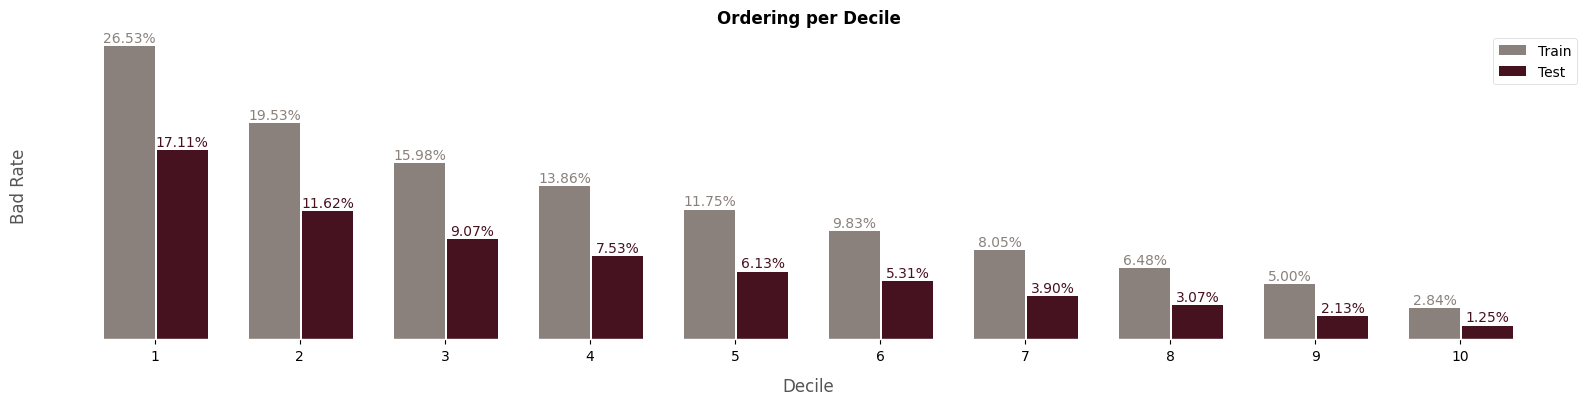

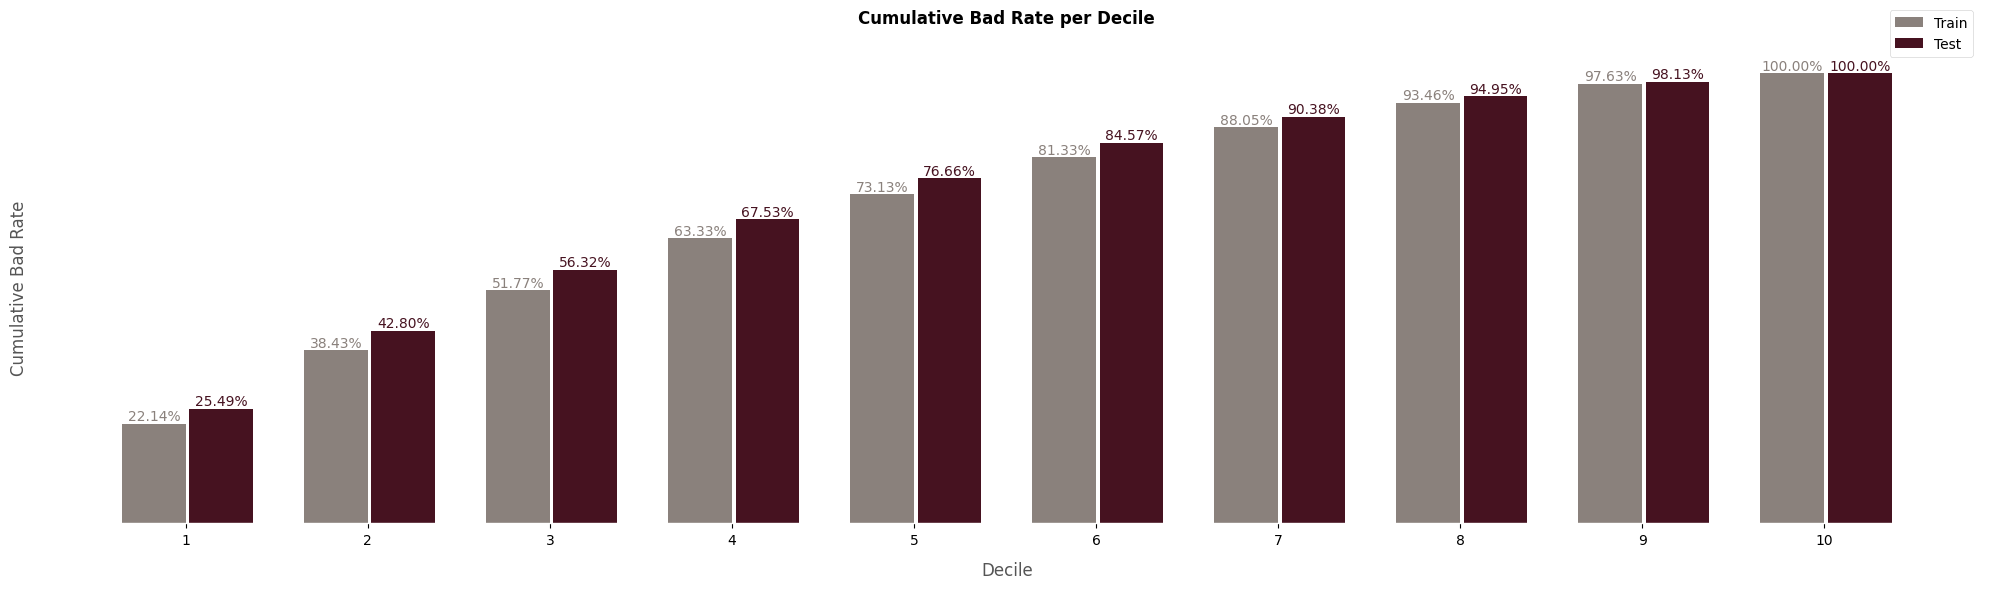

In [25]:
# Analyze whether the scores present ordering.
train_scores_table, test_scores_table = deciles_scores_analysis(y_train, y_test, probas_good_train, probas_good_test)

- It is possible to see that our **PD model's scores** exhibit **ordering**; that is, the **higher** the **score**, the lower the bad rate, and consequently, the **lower** the **credit risk**. This holds true for both the training and test sets, as evident in the first graph.
- It is noticeable that our model concentrates **more than 50%** of the **bad borrowers up to the third decile/score**. This is highly advantageous! With this information, we can establish credit policies and make reasonable loan denials for applicants with lower scores, which can possibly result in some revenue loss but increase profit due to minimized defaults.

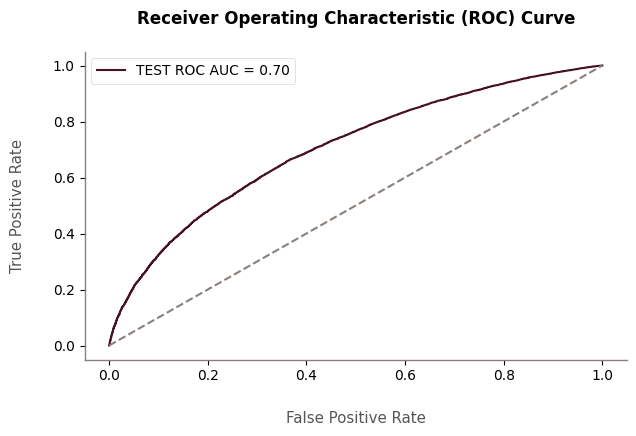

In [26]:
model_metrics = evaluate_credit_scoring_model(y_train, y_test, probas_good_train, probas_good_test, plot=True)

In [27]:
model_metrics

,Metric,Train Value,Test Value
0,KS,0.268233,0.297762
1,AUC,0.683655,0.703445
2,Gini,0.367310,0.406891
3,Brier,0.100512,0.061633


- With a **KS** of approximately **0.3**, an **ROC-AUC** of around **0.7**, and a **Gini** coefficient of about **0.4** on the **test set**, the **application model** exhibits **satisfactory performance**. The model demonstrates **effective discriminatory power**, effectively distinguishing between good and bad borrowers. Examining the **Brier** Score, it is very **close to zero**, indicating that the model presents **well-calibrated probabilities or scores.**
- Furthermore, the **train** and **test** scores for each of these **metrics** are quite **similar**. Consequently, the model is **not overfitted**, has captured the underlying patterns within the data, and is likely to distinguish well between good and bad borrowers in new, unseen data.

#### 3.5 Scorecard and Credit Scores
- Once the **PD Model** is built, it is essential to convert it into a **scorecard**. A scorecard essentially mirrors our PD Model, except that the **coefficients** are transformed into **scores**, integer values **easily interpretable** by individuals unfamiliar with statistical methods. Each dummy variable will be assigned a score, and the applicant's credit score will be obtained by summing the intercept score and the product of each dummy's value and its corresponding score.
- The **definition** of the **score** **varies** across contexts and applications. Here, we will establish a **minimum score** of **300** and a **maximum score** of **850**. Naturally, a **lower score** indicates **higher credit risk**, and vice versa. Additionally, to derive these scores, various calculations will be applied as outlined in the code. These calculations were obtained from a reference of an experienced credit risk professional, Nikolay Georgiev.
    1. First, we calculate the minimum and maximum coefficient sums, denoted as $ \text{min\_sum\_coef} $ and $ \text{max\_sum\_coef} $, respectively. These are obtained by summing the coefficients of the lowest and highest coefficient dummies belonging to each independent variable, plus the intercept.
    - 2. Then, we calculate the scores as:
    $$
    \text{coefficient} \times \frac{\text{max\_score} - \text{min\_score}}{\text{max\_sum\_coef} - \text{min\_sum\_coef}}
    $$
    - 3. Next, we compute the intercept coefficient as:
    $$
    \left( \frac{\text{intercept} - \text{min\_sum\_coef}}{\text{max\_sum\_coef} - \text{min\_sum\_coef}} \right) \times (\text{max\_score} - \text{min\_score}) + \text{min\_score}
    $$
    - 4. Finally, round everything to obtain integer scores, providing an easily interpretable credit risk assessment tool for non-statistical experienced users, the scorecard.

    - 5. Also, from these credit scores, we can obtain the sum of coefficients for a borrower: 
        $$
        \text{sum\_of\_coefficients\_from\_score} = \frac{(\text{scores} - \text{min\_score})}{(\text{max\_score} - \text{min\_score})} \times (\text{max\_sum\_coef} - \text{min\_sum\_coef}) + \text{min\_sum\_coef}
        $$
    - 6. And thus, his probability of being good through the logistic function:
        $$
        \text{probability\_of\_non\_default} = \frac{\exp(\text{sum\_of\_coefficients\_from\_score})}{1 + \exp(\text{sum\_of\_coefficients\_from\_score})}
        $$
        
- After constructing the final scorecard, I will compute the training and test data borrowers scores. Based on this, **credit policies** can be formulated to manage risks and maximize profits. I will design a credit policy and estimate financial gains after constructing the LGD and EAD models. These metrics can aid in the development of credit policies, allowing us to assess the expected ROI of a loan and assisting in the decision-making process of whether to approve or deny it. 

In [28]:
# Obtain the scorecard with scores for the corresponding dummies.
scorecard, min, max = create_scorecard(referece_categories, summary_table)
print(f'The minimum possible credit score is {min}.')
print(f'The maximum possible credit score is {max}.')

The minimum possible credit score is 300.0.
The maximum possible credit score is 852.0.


- It is noticeable that the minimum and maximum scores were correctly set to 300 and 852. The 2-unit difference occurs due to the rounding process, but it does not matter.

In [29]:
scorecard.head(10)

,Dummy,Beta Coefficient,P-Value,Wald Statistic,Score
0,addr_state_AL_NM_NJ,0.056677,0.033638,4.513003,5.0
1,addr_state_AR_TN_MI_UT_VA_LA_PA_AZ_OH_RI_KY_DE_IN,0.149906,0.0,56.760558,12.0
2,addr_state_CA,0.088336,0.000028,17.52886,7.0
3,addr_state_MA_SD_GA_MN_WI_WA_OR_IL_CT,0.227078,0.0,119.826238,18.0
4,addr_state_MS_MT_SC_VT_KS_CO_AK_NH_WV_WY_ID_DC_ME,0.390709,0.0,203.677862,32.0
5,addr_state_NE_IA_NV_HI_FL,0.000000,reference category,reference category,0.0
6,addr_state_NY,0.090361,0.000156,14.294934,7.0
7,addr_state_OK_MO_MD_NC,0.099432,0.000058,16.181933,8.0
8,addr_state_TX,0.275195,0.0,114.438909,22.0
9,annual_inc_120.0K-150.0K,0.853251,0.0,294.868917,69.0


- Now, let's calculate the scores for both training and test data borrowers.

In [36]:
# Obtain training and test data borrowers credit scores.
test_scores = compute_scores(X_test_prepared, y_test, probas_good_test, scorecard)
train_scores = compute_scores(X_train_prepared, y_train, probas_good_train, scorecard)
test_scores.head()

,Actual,Probability of Default (PD),Score
0,1,0.338016,467.0
1,0,0.133322,564.0
2,1,0.191552,530.0
3,1,0.067191,626.0
4,0,0.282811,488.0


In [37]:
# Descriptive statistics on test scores.
test_scores['Score'].describe()

count    93252.000000
mean       608.465963
std         60.623326
min        419.000000
25%        566.000000
50%        605.000000
75%        647.000000
max        820.000000
Name: Score, dtype: float64

In [38]:
# Descriptive statistics on training scores.
train_scores['Score'].describe()

count    373004.000000
mean        589.476263
std          58.876388
min         386.000000
25%         548.000000
50%         585.000000
75%         627.000000
max         815.000000
Name: Score, dtype: float64

- The scores were successfully calculated, and both training and test scores fall into our stablished range, with a minimum score of 386 and a maximum of 820.

#### 3.6 PD Model Artifacts
- I intended to save all the PD model artifacts to use them later in the LGD and EAD modeling notebook. However, due to github large files issues (the PD Model has more than 200 MB), I cannot do it. 
- For instance, I will just save the computed train and test scores. These are the final outcomes of the PD Model and might be sufficient to combine with EAD and LGD Models to estimate the Expected Loss (EL) and design a credit policy.

In [39]:
# Save the PD Model artifacts.
# pd_model_path = os.path.join(os.pardir, 'artifacts/pd_model', 'pd_model.pkl')
# pd_preprocessor_path = os.path.join(os.pardir, 'artifacts/pd_model/pd_preprocessor.pkl')
train_scores_path = '/Users/pedrohenriquealmeidaoliveira/Documents/data_science/lending_club_credit_scoring/artifacts/pd_model/train_scores.parquet'
test_scores_path = '/Users/pedrohenriquealmeidaoliveira/Documents/data_science/lending_club_credit_scoring/artifacts/pd_model/test_scores.parquet'
train_scores.to_parquet(train_scores_path)
test_scores.to_parquet(test_scores_path)
# save_object(pd_model_path, log_reg)
# save_object(pd_preprocessor_path, pipe)

#### 3.7 Conclusion
- In this notebook, I **preprocessed the data, constructed the PD model, and evaluated its performance**. Additionally, I developed a **scorecard** by converting the PD model's coefficients into scores—integer values that make the results easily interpretable for users unfamiliar with statistical methods. Subsequently, I calculated the **credit scores** for each borrower in both the training and test sets.
- The **model's performance** is satisfactory, demonstrating an **ordered distribution of scores** where, as the score increases, the bad rate and credit risk decrease. It exhibits **good discriminatory power**, with an **AUC of 0.7, a KS of 0.3, and a Gini of 0.4**. Furthermore, the **metrics** for both the **training and test** sets are **similar**, indicating that the model is not overfitted and will generalize well to new, unseen data.